In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rootPath = "/Users/halit/Downloads/research/ml-10M100K/"
tagsPath = rootPath + "tags.dat"
ratingsPath = rootPath +"ratings.dat"
moviesPath = rootPath + "movies.dat"

tag_headers = ['user_id', 'movie_id', 'tag', 'timestamp']
rating_headers = ['user_id', 'movie_id', 'rating', 'timestamp']
movie_headers = ['movie_id', 'title', 'genres']


In [2]:
tags = pd.read_table(tagsPath, sep='::', header=None, names=tag_headers)

/Users/halit/venv/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [3]:
movies = pd.read_table(moviesPath,
                       sep='::', header=None, names=movie_headers)

movie_titles = movies.title.tolist()
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_table(ratingsPath, sep=',', header=None, names=rating_headers)

   user_id  movie_id  rating  timestamp
0        1       122       5  838985046
1        1       185       5  838983525
2        1       231       5  838983392
3        1       292       5  838983421
4        1       316       5  838983392


In [6]:
ratings.head() 
tags.head()
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df = movies.join(ratings, on=['movie_id'], rsuffix='_r').join(tags, on=['movie_id'], rsuffix='_t')
del df['movie_id_r']
del df['user_id_t']
del df['movie_id_t']
del df['timestamp_t']

In [8]:
df.head()

,movie_id,title,genres,user_id,rating,timestamp,tag
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,5,838983525,politics
1,2,Jumanji (1995),Adventure|Children|Fantasy,1,5,838983392,satire
2,3,Grumpier Old Men (1995),Comedy|Romance,1,5,838983421,chick flick 212
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1,5,838983392,hanks
4,5,Father of the Bride Part II (1995),Comedy,1,5,838983392,ryan


In [12]:
rp = df.pivot_table(columns=['movie_id'],index=['user_id'],values='rating', fill_value =0)
rp.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,65006,65011,65025,65027,65037,65088,65091,65126,65130,65133
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,5,5,5,5,5,5,5,5,5,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
Q = rp.values

In [15]:
Q.shape

(303, 10681)

In [16]:
#transform into implicit feedback
W = Q>0.5
W[W == True] = 1
W[W == False] = 0
# To be consistent with our Q matrix
W = W.astype(np.float64, copy=False)



In [17]:
W

array([[ 1.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  1.,  1.]])

In [18]:
lambda_ = 0.1
n_factors = 100
m, n = Q.shape
n_iterations = 20

In [19]:
X = 5 * np.random.rand(m, n_factors) 
Y = 5 * np.random.rand(n_factors, n)

In [20]:
def get_error(Q, X, Y, W):
    return np.sum((W * (Q - np.dot(X, Y)))**2)

In [21]:
errors = []
for ii in range(n_iterations):
    X = np.linalg.solve(np.dot(Y, Y.T) + lambda_ * np.eye(n_factors), 
                        np.dot(Y, Q.T)).T
    Y = np.linalg.solve(np.dot(X.T, X) + lambda_ * np.eye(n_factors),
                        np.dot(X.T, Q))
    if ii % 100 == 0:
        print('{}th iteration is completed'.format(ii))
    errors.append(get_error(Q, X, Y, W))
Q_hat = np.dot(X, Y)
print('Error of rated movies: {}'.format(get_error(Q, X, Y, W)))

0th iteration is completed
Error of rated movies: 15677.8338343


Populating the interactive namespace from numpy and matplotlib


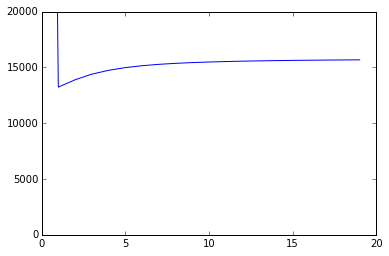

In [31]:
%pylab inline
plt.plot(errors);
plt.ylim([0, 20000]);

In [32]:
def print_recommendations(W=W, Q=Q, Q_hat=Q_hat, movie_titles=movie_titles):
    #Q_hat -= np.min(Q_hat)
    #Q_hat[Q_hat < 1] *= 5
    Q_hat -= np.min(Q_hat)
    Q_hat *= float(5) / np.max(Q_hat)
    movie_ids = np.argmax(Q_hat - 5 * W, axis=1)
    for jj, movie_id in zip(range(m), movie_ids):
        #if Q_hat[jj, movie_id] < 0.1: continue
        print('User {} liked {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq > 3])))
        print('User {} did not like {}\n'.format(jj + 1, ', '.join([movie_titles[ii] for ii, qq in enumerate(Q[jj]) if qq < 3 and qq != 0])))
        print('\n User {} recommended movie is {} - with predicted rating: {}'.format(
                    jj + 1, movie_titles[movie_id], Q_hat[jj, movie_id]))
        print('\n' + 100 *  '-' + '\n')
#print_recommendations()

In [33]:
##Errors


In [35]:
weighted_errors = []
for ii in range(n_iterations):
    for u, Wu in enumerate(W):
        X[u] = np.linalg.solve(np.dot(Y, np.dot(np.diag(Wu), Y.T)) + lambda_ * np.eye(n_factors),
                               np.dot(Y, np.dot(np.diag(Wu), Q[u].T))).T
    for i, Wi in enumerate(W.T):
        Y[:,i] = np.linalg.solve(np.dot(X.T, np.dot(np.diag(Wi), X)) + lambda_ * np.eye(n_factors),
                                 np.dot(X.T, np.dot(np.diag(Wi), Q[:, i])))
    weighted_errors.append(get_error(Q, X, Y, W))
    print('{}th iteration is completed'.format(ii))
weighted_Q_hat = np.dot(X,Y)
#print('Error of rated movies: {}'.format(get_error(Q, X, Y, W)))

plt.plot(weighted_errors);
plt.xlabel('Iteration Number');
plt.ylabel('Mean Squared Error');

KeyboardInterrupt: 

In [ ]:
#print_recommendations(Q_hat=weighted_Q_hat)